In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [10]:
missing = df.isnull().sum().sort_values(ascending=False)

In [12]:
missing = pd.concat([missing, (missing / len(df) * 100)], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing

,missing_count,missing_pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


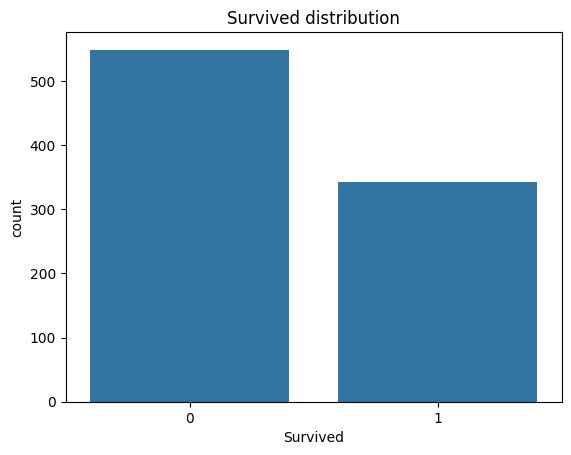

In [13]:
sns.countplot(x='Survived', data=df)
plt.title('Survived distribution')
plt.show()

In [14]:
df['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

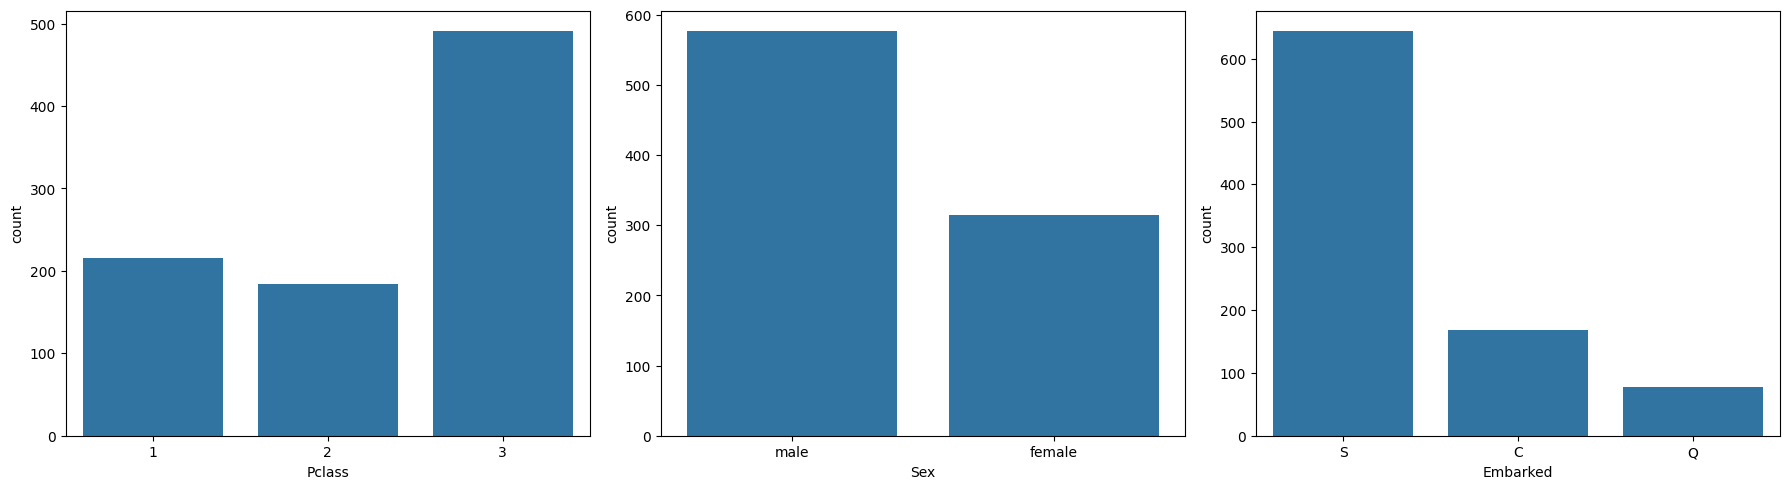

In [16]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.countplot(x='Pclass', data=df, ax=axes[0])
sns.countplot(x='Sex', data=df, ax=axes[1])
sns.countplot(x='Embarked', data=df, ax=axes[2])
plt.tight_layout()


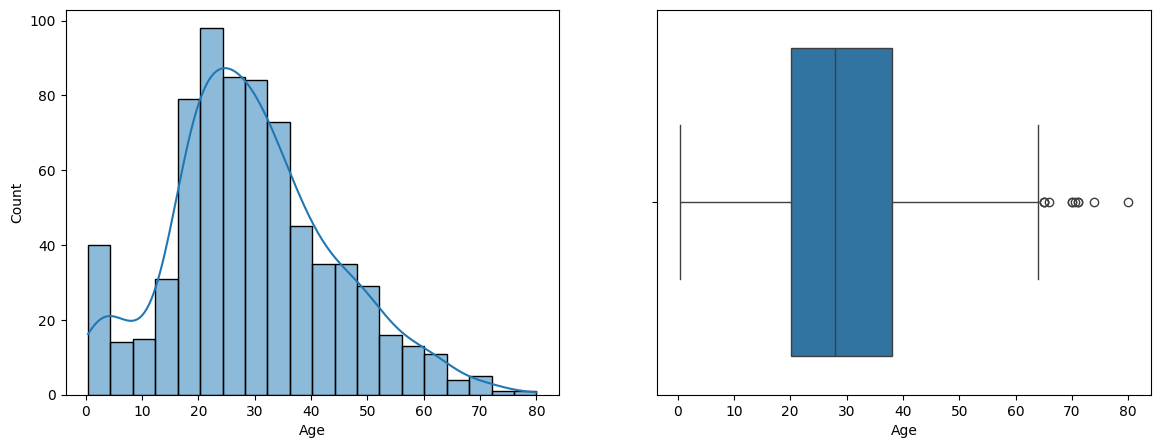

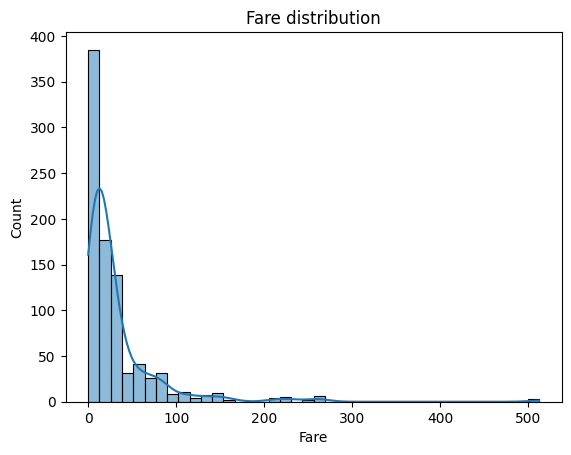

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(df['Age'].dropna(), kde=True, ax=ax[0])
sns.boxplot(x=df['Age'], ax=ax[1])
plt.show()

sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Fare distribution')
plt.show()

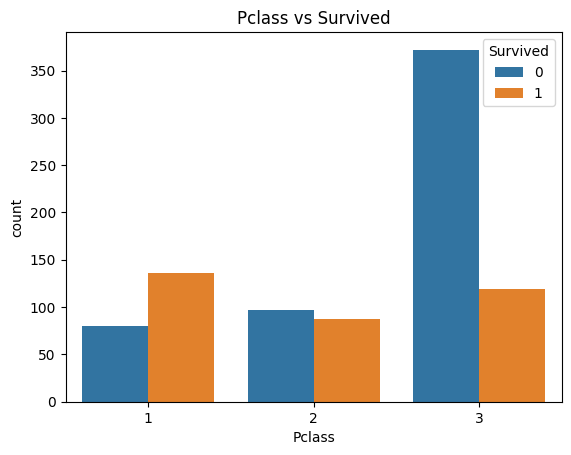

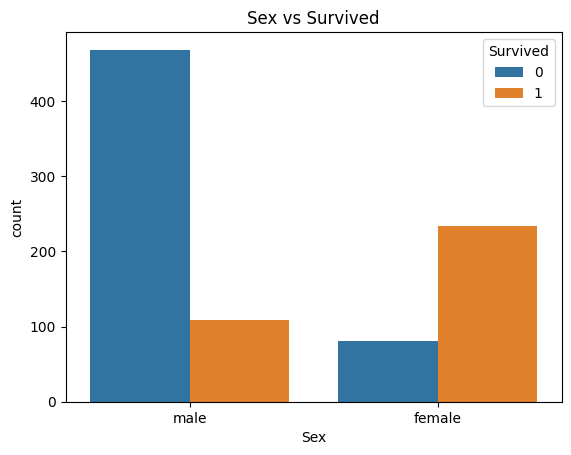

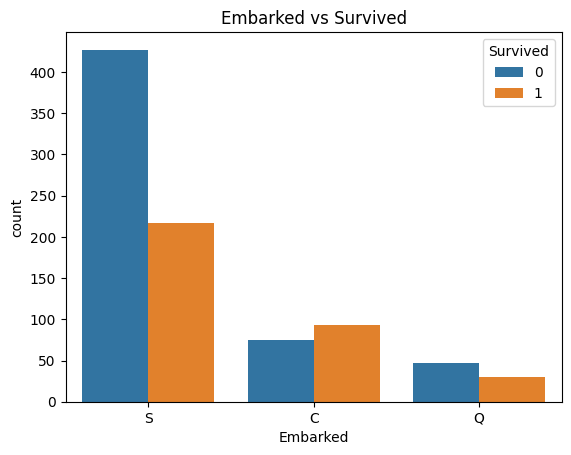

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survived')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survived')
plt.show()


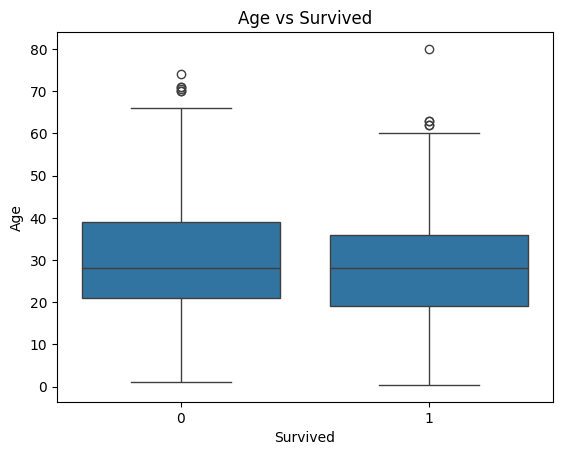

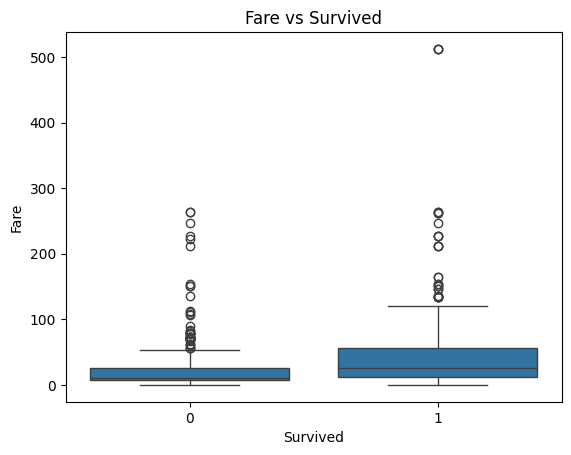

In [20]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survived')
plt.show()


In [21]:
df.groupby(['Pclass','Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [22]:
pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc=np.mean)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21164\713063712.py:1: FutureWarning: The provided callable <function mean at 0x000001B8D5CA6DE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc=np.mean)


Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


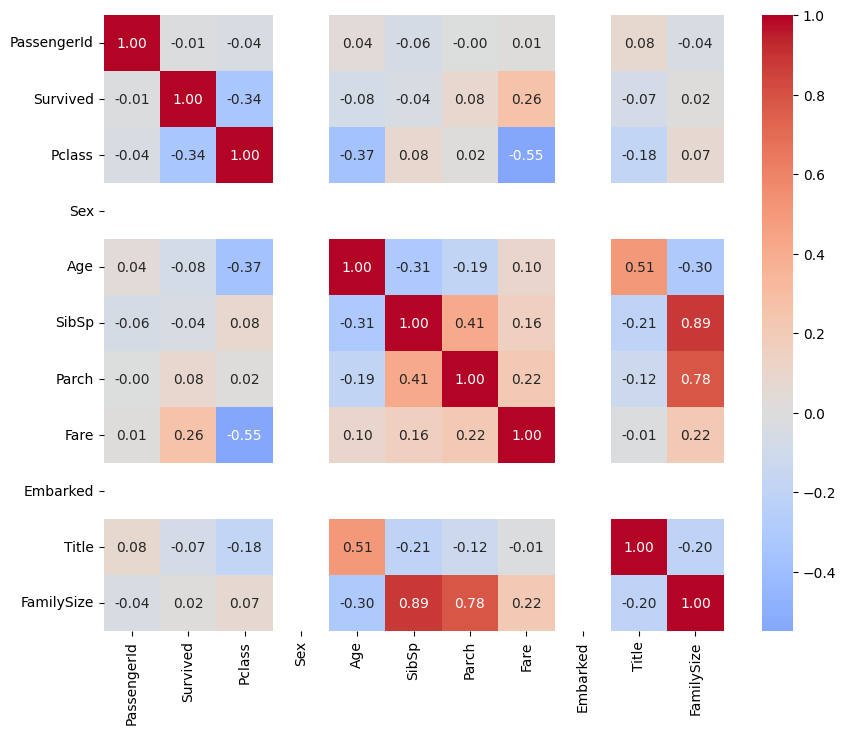

In [39]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
corr_df = corr_df.drop(columns=cols_to_drop, errors='ignore')

corr_df['Sex'] = corr_df['Sex'].map({'male':0,'female':1})
corr_df['Embarked'] = corr_df['Embarked'].map({'S':0,'C':1,'Q':2})

corr = corr_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.show()


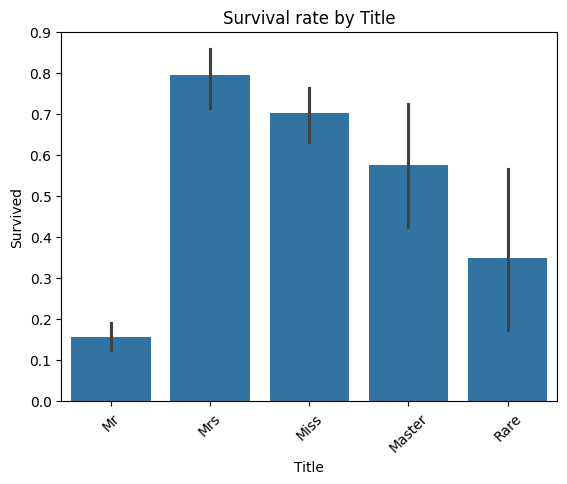

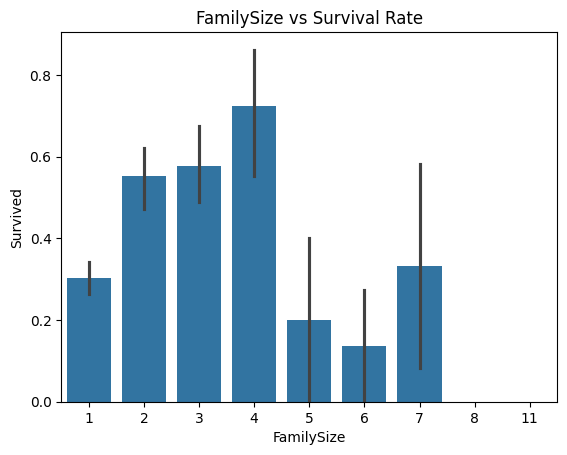

In [33]:
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival rate by Title')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('FamilySize vs Survival Rate')
plt.show()

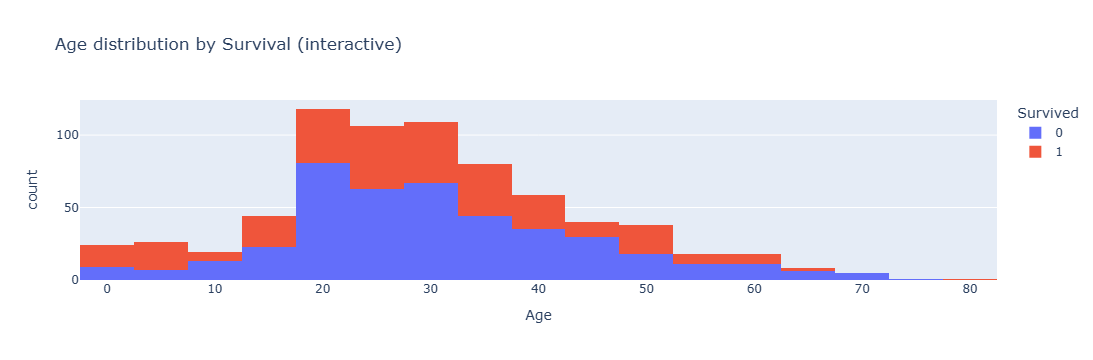

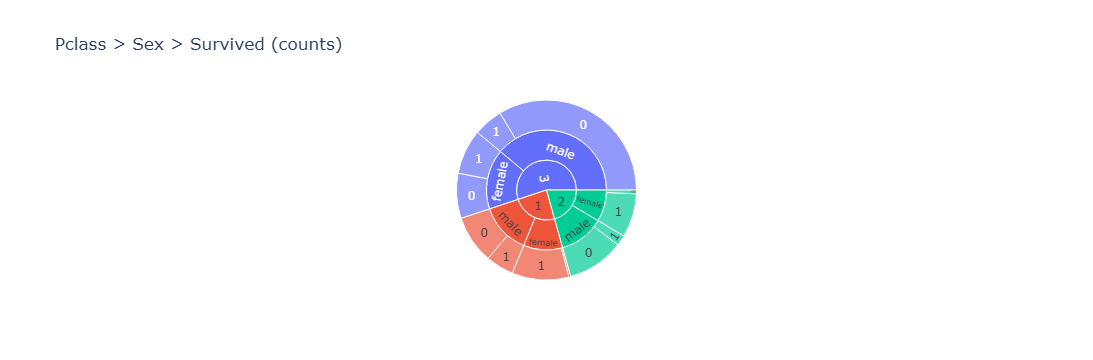

In [41]:
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title='Age distribution by Survival (interactive)')
fig.show()

fig = px.sunburst(df, path=['Pclass','Sex','Survived'], title='Pclass > Sex > Survived (counts)')
fig.show()